In [1]:
import pandas as pd

In [2]:
cosmetics=pd.read_csv(r"C:\Users\epoh2\Documents\NSS\NSS\Python\projects\Cosmetics\data\cosmetics.csv")

In [3]:
cosmetics2=pd.read_csv(r"C:\Users\epoh2\Documents\NSS\NSS\Python\projects\Cosmetics\data\cosmetics2.csv")

C:\Users\epoh2\AppData\Local\Temp\ipykernel_39348\2875099562.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  cosmetics2=pd.read_csv(r"C:\Users\epoh2\Documents\NSS\NSS\Python\projects\Cosmetics\data\cosmetics2.csv")


In [4]:
cosmetics3=pd.read_csv(r"C:\Users\epoh2\Documents\NSS\NSS\Python\projects\Cosmetics\data\cosmetics3.csv")

In [5]:
cosmetics2.head(1)

,Product Id,Company,Brand,Product Name,Variant,Product Discontinued Date,Product Submitted Date,Ingredient Name,Function,Unit of Measure,Concentration,Ingredient Submitted Date,Ingredient Removed Date,UPC,Body Area,Product Category,Product Form,Intended Market
0,18358,Nail Alliance - Entity,Entity Nudite,Cool Pink Nail Sculpting Powder,NaN,NaN,6/24/2019,Titanium dioxide (CI 77891) 13463-67-7 / 1317-...,NaN,mg/g,5,6/24/2019,NaN,Not Available,Nails,Artificial Nails and Related Products,Powder,Not Available


In [6]:
cosmetics.head(1)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1


In [7]:
cosmetics3.head(1)

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [8]:
cosmetics3.columns

Index(['CDPHId', 'ProductName', 'CSFId', 'CSF', 'CompanyId', 'CompanyName',
       'BrandName', 'PrimaryCategoryId', 'PrimaryCategory', 'SubCategoryId',
       'SubCategory', 'CasId', 'CasNumber', 'ChemicalId', 'ChemicalName',
       'InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate',
       'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved',
       'ChemicalCount'],
      dtype='object')

In [9]:
cosmetics3=cosmetics3.drop(columns = ['CDPHId','CSFId','CSF','CompanyId','PrimaryCategoryId','SubCategoryId','CasId','CasNumber','ChemicalId'])

In [10]:
cosmetics3['ChemicalName'].unique()

array(['Titanium dioxide', 'Distillates (coal tar)', 'Estragole',
       'Cocamide diethanolamine', 'Toluene',
       'Chromium (hexavalent compounds)', 'Retinol',
       'Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.',
       'Vitamin A', 'Vitamin A palmitate', 'Butylated hydroxyanisole',
       'Coffea arabica extract', 'Lauramide diethanolamine', 'Coffee',
       'Silica, crystalline (airborne particles of respirable size)',
       'Carbon black (airborne, unbound particles of respirable size)',
       'Carbon black', 'Genistein (purified)', 'Progesterone',
       '2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)',
       'Methyleugenol', 'Carbon-black extracts', 'Retinyl palmitate',
       'o-Phenylphenol', 'Acrylamide', 'Formaldehyde (gas)',
       'Ginkgo biloba extract', 'Mica', 'Ethylene glycol',
       'Acetic acid, retinyl ester', 'Ethyl acrylate', 'Trade Secret',
       'Methanol', 'Mineral oils, untreated 

In [11]:
cosmetics3['ChemicalName'].str.contains('Titanium dioxide').sum()

93564

titanium dioxide indicator 

In [13]:
for ind,row in cosmetics3.iterrows():
    if 'Titanium dioxide' in row.ChemicalName:
        cosmetics3.loc[ind,'Titanium_dioxide']=True
    else : 
        cosmetics3.loc[ind,'Titanium_dioxide']=False

In [14]:
cosmetics3.columns

Index(['ProductName', 'CompanyName', 'BrandName', 'PrimaryCategory',
       'SubCategory', 'ChemicalName', 'InitialDateReported',
       'MostRecentDateReported', 'DiscontinuedDate', 'ChemicalCreatedAt',
       'ChemicalUpdatedAt', 'ChemicalDateRemoved', 'ChemicalCount',
       'Titanium_dioxide'],
      dtype='object')

In [ ]:
cosmetics3

Top 5 most common chemicals in cosmetics

In [16]:
common=cosmetics3['ChemicalName'].value_counts().head(5)
common=common.reset_index()
type(common)

pandas.core.frame.DataFrame

In [136]:
main=cosmetics3


In [138]:
main.to_csv('main.csv')

In [17]:
common.to_csv('common_chemicals.csv')

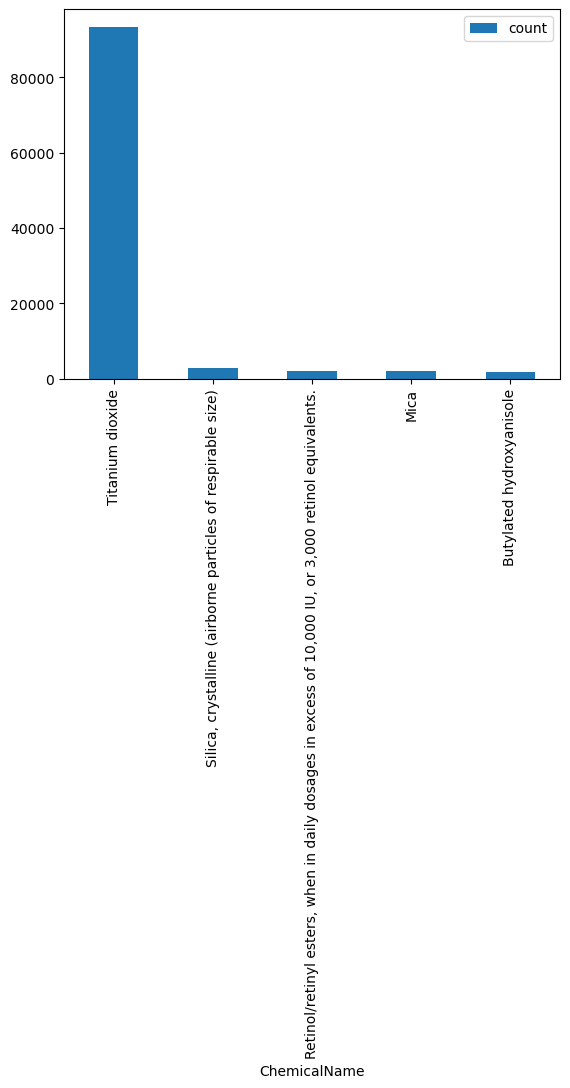

In [18]:
common.plot(kind = 'bar', 
                 x = 'ChemicalName', 
                 y = 'count');

Which brand has the highest percentage of products with titanium dioxide?

In [20]:
products_titanium=cosmetics3.loc[cosmetics3['Titanium_dioxide']==True]

In [21]:
company_titanium=products_titanium['CompanyName'].value_counts().reset_index()

In [22]:
company_titanium=company_titanium.rename(columns= {'count':'titanium_count'})

In [23]:
cosmeticscounts=cosmetics3['CompanyName'].value_counts().reset_index()
cosmeticscounts=cosmeticscounts.rename(columns={'count':'product_count'})

In [24]:
titanium_and_company=pd.merge(company_titanium,cosmeticscounts,on='CompanyName')

In [25]:
titanium_and_company

,CompanyName,titanium_count,product_count
0,L'Oreal USA,5743,5747
1,Revlon Consumer Product Corporation,4226,4341
2,S+,3990,5165
3,Coty,3792,5162
4,"Bare Escentuals Beauty, Inc.",3782,3828
...,...,...,...
452,PureTek Corporation,1,1
453,2355644 Ontario Inc.,1,1
454,Pettenon Cosmetici srl,1,6
455,Ladove Inc,1,1


In [26]:
titanium_and_company=titanium_and_company[titanium_and_company['product_count']>titanium_and_company['titanium_count']]

In [27]:
titanium_and_company['percent_titanium_dioxide']= titanium_and_company['titanium_count']/titanium_and_company['product_count']
titanium_and_company['percent_titanium_dioxide']=titanium_and_company['percent_titanium_dioxide'].sort_values(ascending=False)

C:\Users\epoh2\AppData\Local\Temp\ipykernel_39348\2566838901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanium_and_company['percent_titanium_dioxide']= titanium_and_company['titanium_count']/titanium_and_company['product_count']
C:\Users\epoh2\AppData\Local\Temp\ipykernel_39348\2566838901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanium_and_company['percent_titanium_dioxide']=titanium_and_company['percent_titanium_dioxide'].sort_values(ascending=False)


In [28]:
titanium_and_company['percent_titanium_dioxide']=titanium_and_company['percent_titanium_dioxide'].apply(lambda x: '{:.2%}'.format(x))

C:\Users\epoh2\AppData\Local\Temp\ipykernel_39348\1553889889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanium_and_company['percent_titanium_dioxide']=titanium_and_company['percent_titanium_dioxide'].apply(lambda x: '{:.2%}'.format(x))


In [29]:
titanium_and_company.sort_values('percent_titanium_dioxide',ascending=False).head(5)

,CompanyName,titanium_count,product_count,percent_titanium_dioxide
0,L'Oreal USA,5743,5747,99.93%
52,"KOS� America, Inc.",423,424,99.76%
43,"Shiseido Co., Ltd.",565,567,99.65%
12,"Beauty 21 Cosmetics, Inc.",1670,1676,99.64%
75,"Bonne Bell, LLC",253,254,99.61%


In [30]:
titanium_and_company.to_csv('titanium_and_company.csv')

Are certain chemicals product category specific?

In [32]:
cosmetics3.groupby('SubCategory')['ChemicalName'].value_counts()

SubCategory                              ChemicalName                                                                                       
Acne Products (making a cosmetic claim)  Titanium dioxide                                                                                       138
                                         Retinol                                                                                                  6
                                         Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.      5
                                         Triethanolamine                                                                                          5
                                         Cocamide MEA                                                                                             3
                                                                                                                       

In [33]:
top5=cosmetics3['SubCategory'].value_counts().head().reset_index().SubCategory

In [34]:
top5=cosmetics3.loc[cosmetics3.SubCategory.isin(top5)]

In [35]:
top5_df=top5.groupby('SubCategory')['ChemicalName'].value_counts().reset_index()

In [36]:
top5_df['rank']=top5_df.groupby('SubCategory')['count'].rank(ascending=False)

In [37]:
top5_df=top5_df.loc[top5_df['rank']<=5.0]

In [38]:
top5_df.to_csv('top5_titanium.csv')

,CompanyName,titanium_count,product_count,percent_titanium_dioxide
0,L'Oreal USA,5743,5747,99.93%
1,Revlon Consumer Product Corporation,4226,4341,97.35%
2,S+,3990,5165,77.25%
3,Coty,3792,5162,73.46%
4,"Bare Escentuals Beauty, Inc.",3782,3828,98.80%
...,...,...,...,...
445,California Mango,1,3,33.33%
446,Unite Eurotherapy,1,18,5.56%
447,CALIFORNIA NORTH,1,4,25.00%
448,Ca-botana International,1,2,50.00%


Chemicals that cause cancer

In [40]:
carcinogens=pd.read_csv('list_of_chemicals.csv')

In [41]:
carcinogens['Group'].value_counts()

Group
3     501
2B    322
1     133
2A     96
Name: count, dtype: int64

In [42]:
carcinogens['Group'].unique()

array([nan, '1', '2A', '2B', '3'], dtype=object)

In [43]:
carcinogens.loc[carcinogens['Group']=='1']

,CAS No.,Agent,Group,Volume,Volume publication year,Evaluation year,Additional information
68,NaN,Clonorchis sinensis (infection with),1,"61, 100B",2012,2009.0,NaN
69,NaN,Helicobacter pylori (infection with),1,"61, 100B",2012,2009.0,NaN
70,NaN,Opisthorchis viverrini (infection with),1,"61, 100B",2012,2009.0,NaN
71,NaN,Schistosoma haematobium (infection with),1,"61, 100B",2012,2009.0,NaN
72,NaN,"Acheson process, occupational exposure associa...",1,111,2017,2014.0,NaN
...,...,...,...,...,...,...,...
196,87-86-5,Pentachlorophenol (see also Polychlorophenols),1,"53, 71, 117",2019,2016.0,NaN
197,91-59-8,2-Naphthylamine,1,"4, Sup 7, 99, 100F",2012,2009.0,NaN
198,92-67-1,4-Aminobiphenyl,1,"1, Sup 7, 99, 100F",2012,2009.0,NaN
199,92-87-5,Benzidine,1,"29, Sup 7, 99, 100F",2012,2009.0,NaN


In [44]:
for ind,row in carcinogens.iterrows():
    group_str= str(row.Group)
    if '1' in group_str:
        carcinogens.loc[ind,'Causes_cancer']='Carcinogenic to humans'
    if '2A'in group_str:
        carcinogens.loc[ind,'Causes_cancer']='Possibly Carcinogenic '
    if '2B' in group_str:
        carcinogens.loc[ind,'Causes_cancer']='Possibly Carcinogenic'
    if '3' in group_str:
        carcinogens.loc[ind,'Causes_cancer']='Not classifiable'
    else : 
        carcinogens.loc[ind,'Causes_cancer']='N/A'

In [116]:
carcinogens[carcinogens['Causes_cancer'] == 'Carcinogenic to humans']

,CAS No.,Agent,Group,Volume,Volume publication year,Evaluation year,Additional information,Causes_cancer


Are harmful chemicals more likely to be seen in cheaper products?

In [47]:
cosmetics3['CompanyName'].value_counts()

CompanyName
L'Oreal USA                            5747
S+                                     5165
Coty                                   5162
Revlon Consumer Product Corporation    4341
Bare Escentuals Beauty, Inc.           3828
                                       ... 
Hada S.A.                                 1
LES SALONS DU PALAIS ROYAL SHISEIDO       1
Tupperware U.S., Inc.                     1
OSEA Malibu                               1
Turquise Global LLC                       1
Name: count, Length: 606, dtype: int64

In [48]:
cosmetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [49]:
cosmetics.isna().sum()

Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [50]:
cosmetics['Brand'].value_counts

<bound method IndexOpsMixin.value_counts of 0                              LA MER
1                               SK-II
2                      DRUNK ELEPHANT
3                              LA MER
4                        IT COSMETICS
                    ...              
1467                           KORRES
1468                  KATE SOMERVILLE
1469                    VITA LIBERATA
1470    ST. TROPEZ TANNING ESSENTIALS
1471                       DERMAFLASH
Name: Brand, Length: 1472, dtype: object>

In [51]:
cosmetics['Label'].value_counts()

Label
Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: count, dtype: int64

In [52]:
cosmetics2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851402 entries, 0 to 851401
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Product Id                 851402 non-null  int64 
 1   Company                    851402 non-null  object
 2   Brand                      851162 non-null  object
 3   Product Name               851402 non-null  object
 4   Variant                    230574 non-null  object
 5   Product Discontinued Date  45794 non-null   object
 6   Product Submitted Date     851402 non-null  object
 7   Ingredient Name            851402 non-null  object
 8   Function                   731365 non-null  object
 9   Unit of Measure            300662 non-null  object
 10  Concentration              302952 non-null  object
 11  Ingredient Submitted Date  851402 non-null  object
 12  Ingredient Removed Date    10642 non-null   object
 13  UPC                        851289 non-null  

In [53]:
cosmetics2.isna().sum()

Product Id                        0
Company                           0
Brand                           240
Product Name                      0
Variant                      620828
Product Discontinued Date    805608
Product Submitted Date            0
Ingredient Name                   0
Function                     120037
Unit of Measure              550740
Concentration                548450
Ingredient Submitted Date         0
Ingredient Removed Date      840760
UPC                             113
Body Area                      7003
Product Category                  0
Product Form                  11273
Intended Market                  21
dtype: int64

In [54]:
cosmetics2['Brand'].value_counts()

Brand
Bath & Body Works                63192
Victoria's Secret Beauty         22633
GIORGIO ARMANI                   22616
The White Company                16006
Lancome                          13622
                                 ...  
Rite Aid Sensitive Toothpaste        1
CANDY COLOR                          1
RITUELS BOTAN. BODY                  1
Calvin Klein Man                     1
 Entity Nudite                       1
Name: count, Length: 3744, dtype: int64

In [55]:
cosmetics3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductName             114635 non-null  object
 1   CompanyName             114635 non-null  object
 2   BrandName               114408 non-null  object
 3   PrimaryCategory         114635 non-null  object
 4   SubCategory             114635 non-null  object
 5   ChemicalName            114635 non-null  object
 6   InitialDateReported     114635 non-null  object
 7   MostRecentDateReported  114635 non-null  object
 8   DiscontinuedDate        12920 non-null   object
 9   ChemicalCreatedAt       114635 non-null  object
 10  ChemicalUpdatedAt       114635 non-null  object
 11  ChemicalDateRemoved     2985 non-null    object
 12  ChemicalCount           114635 non-null  int64 
 13  Titanium_dioxide        114635 non-null  object
dtypes: int64(1), object(13)
memory usage

In [56]:
cosmetics3.isna().sum()

ProductName                    0
CompanyName                    0
BrandName                    227
PrimaryCategory                0
SubCategory                    0
ChemicalName                   0
InitialDateReported            0
MostRecentDateReported         0
DiscontinuedDate          101715
ChemicalCreatedAt              0
ChemicalUpdatedAt              0
ChemicalDateRemoved       111650
ChemicalCount                  0
Titanium_dioxide               0
dtype: int64

In [57]:
cosmetics3['BrandName'].value_counts()

BrandName
SEPHORA               3394
NYX                   3227
bareMinerals          3158
Charlotte Tilbury     2453
Revlon                2335
                      ... 
Ayur SPF 30              1
Sears                    1
53 Elegant Rubin         1
Yoanna Warm Sunset       1
Ruby Kisses              1
Name: count, Length: 2713, dtype: int64

In [58]:
cosmetics3['BrandName'].unique()

array(['AVON', "Glover's", 'OPI', ..., 'sulwhasoo ', 'HAIR FOOD',
       'YANBAL'], dtype=object)